In [1]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
# reading and shuffling the data

# difference = 0
df = pd.read_csv("FoDS-A1.csv")
df = df.sample(frac = 1)

In [3]:
# normalising the data values

myData = (df - df.min()) / (df.max() - df.min())
X = myData.iloc[:, :-1].to_numpy()
X1 = myData.iloc[:, 0:1].to_numpy()    # strength
X2 = myData.iloc[:, 1:2].to_numpy()    # temperature
Y = myData.iloc[:, -1:].to_numpy()       # pressure

In [4]:
# splitting the dataset into training data and testing data

splitData = int(0.7 * len(myData))
train_X, test_X, train_X1, test_X1, train_X2, test_X2, train_Y, test_Y = X[:splitData], X[splitData:], X1[:splitData], X1[splitData:], X2[:splitData], X2[splitData:], Y[:splitData], Y[splitData:]

In [5]:
#setting parameters of the model

maxDeg = 9
iter_value = 50
iter_value += 1
skip_num = 5
learningRate = 0.1
iter_scaled= int(((iter_value-1)/skip_num)+1)
coeff_list = np.zeros((maxDeg+1, maxDeg+1, maxDeg+1))
error_array = np.zeros((maxDeg+1, iter_scaled))

In [6]:
def GD(deg, X1, X2, Y, learning_rate, iterations):
    
    wMatrix = np.zeros((deg+1, deg+1))
    for m in range(deg+1):
        for n in range(deg+1-m):
            wMatrix[m][n] = np.random.randn()
                
    for itr in range(iterations):
        sumItrError = 0
        dataP_errorList = []

        for z in range(len(Y)):               # for each row in input data
            row1 = X1[z]                             # contains strength
            row2 = X2[z]                            # contains temperature
            column = Y[z]                         # contains pressure
            dataP_error = 0                     # variable for calculating error in each input feature
            
            for m in range(deg+1):                    # power of x1
                for n in range(deg+1-m):            # power of x2
                    dataP_error += wMatrix[m][n]*(row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
            dataP_error -= column                    # (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...) - yn 
            dataP_errorList.append(dataP_error)
            sumItrError +=  (dataP_error**2)*0.5              
    
        sumItrError = (sumItrError/len(Y))**0.5
        
        for m in range(deg+1):
            for n in range(deg+1-m): 
                subSum = 0
                for z in range(len(Y)):
                    row1 = X1[z]              # contains strength
                    row2 = X2[z]             # contains temperature
                    subSum += dataP_errorList[z] * (row1**m) * (row2**n)
                wMatrix[m][n] -= (learning_rate/len(Y))  * subSum

        if(itr%skip_num == 0):
            index = int(itr/skip_num)
            error_array[deg][index] = sumItrError
            print("Error of ", itr ," iteration of degree ", deg, " :  " ,sumItrError)
            
        if(itr == iterations - 1): 
            print("\nError of end of iteration of degree ", deg, " is:  " ,sumItrError)   
            
            for m in range(deg+1):                   # power of x1
                for n in range(deg+1-m):
                    coeff_list[deg][m][n] = wMatrix[m][n]
    return sumItrError

Error of  0  iteration of degree  0  :   [0.19552683]
Error of  5  iteration of degree  0  :   [0.10586421]
Error of  10  iteration of degree  0  :   [0.07460078]
Error of  15  iteration of degree  0  :   [0.0636999]
Error of  20  iteration of degree  0  :   [0.059899]
Error of  25  iteration of degree  0  :   [0.05857371]
Error of  30  iteration of degree  0  :   [0.0581116]
Error of  35  iteration of degree  0  :   [0.05795048]
Error of  40  iteration of degree  0  :   [0.0578943]
Error of  45  iteration of degree  0  :   [0.05787471]
Error of  50  iteration of degree  0  :   [0.05786788]

Error of end of iteration of degree  0  is:   [0.05786788]


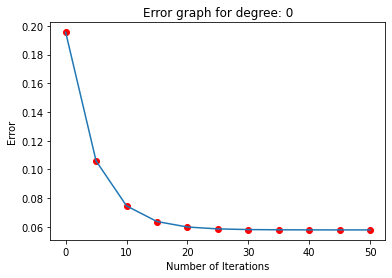

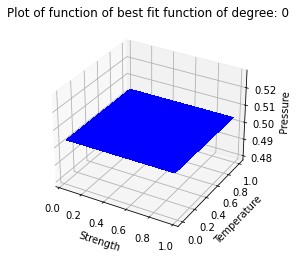


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  1  :   [0.26198511]
Error of  5  iteration of degree  1  :   [0.10349891]
Error of  10  iteration of degree  1  :   [0.07275126]
Error of  15  iteration of degree  1  :   [0.06642118]
Error of  20  iteration of degree  1  :   [0.06476838]
Error of  25  iteration of degree  1  :   [0.0640207]
Error of  30  iteration of degree  1  :   [0.0634567]
Error of  35  iteration of degree  1  :   [0.06293786]
Error of  40  iteration of degree  1  :   [0.06243709]
Error of  45  iteration of degree  1  :   [0.06194862]
Error of  50  iteration of degree  1  :   [0.06147082]

Error of end of iteration of degree  1  is:   [0.06147082]


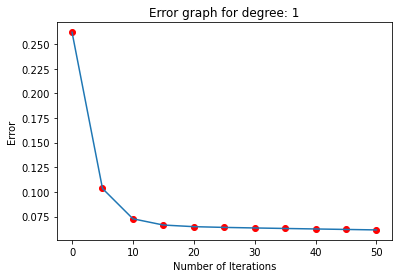

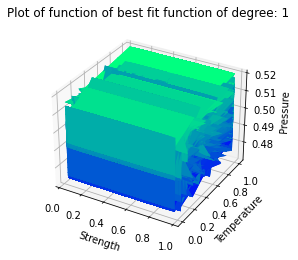


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  2  :   [0.33496184]
Error of  5  iteration of degree  2  :   [0.14470038]
Error of  10  iteration of degree  2  :   [0.12011905]
Error of  15  iteration of degree  2  :   [0.11559008]
Error of  20  iteration of degree  2  :   [0.11352056]
Error of  25  iteration of degree  2  :   [0.11178303]
Error of  30  iteration of degree  2  :   [0.11011841]
Error of  35  iteration of degree  2  :   [0.10849359]
Error of  40  iteration of degree  2  :   [0.10690296]
Error of  45  iteration of degree  2  :   [0.10534448]
Error of  50  iteration of degree  2  :   [0.10381668]

Error of end of iteration of degree  2  is:   [0.10381668]


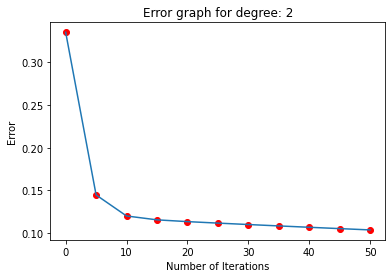

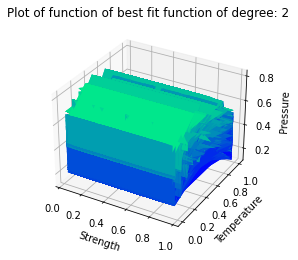


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  3  :   [0.27743778]
Error of  5  iteration of degree  3  :   [0.14167961]
Error of  10  iteration of degree  3  :   [0.12017212]
Error of  15  iteration of degree  3  :   [0.11018898]
Error of  20  iteration of degree  3  :   [0.102818]
Error of  25  iteration of degree  3  :   [0.09694217]
Error of  30  iteration of degree  3  :   [0.09217366]
Error of  35  iteration of degree  3  :   [0.0882542]
Error of  40  iteration of degree  3  :   [0.08498948]
Error of  45  iteration of degree  3  :   [0.08223116]
Error of  50  iteration of degree  3  :   [0.07986583]

Error of end of iteration of degree  3  is:   [0.07986583]


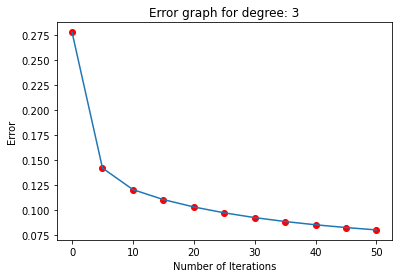

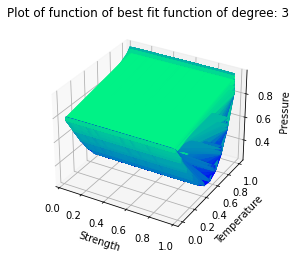


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  4  :   [0.6527866]
Error of  5  iteration of degree  4  :   [0.28086537]
Error of  10  iteration of degree  4  :   [0.24757359]
Error of  15  iteration of degree  4  :   [0.23512672]
Error of  20  iteration of degree  4  :   [0.22490088]
Error of  25  iteration of degree  4  :   [0.21560143]
Error of  30  iteration of degree  4  :   [0.206995]
Error of  35  iteration of degree  4  :   [0.19895352]
Error of  40  iteration of degree  4  :   [0.19138613]
Error of  45  iteration of degree  4  :   [0.18422611]
Error of  50  iteration of degree  4  :   [0.1774237]

Error of end of iteration of degree  4  is:   [0.1774237]


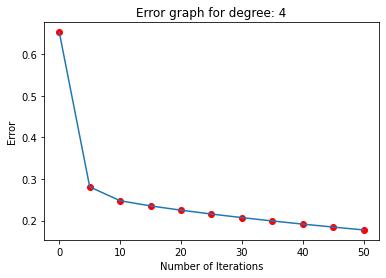

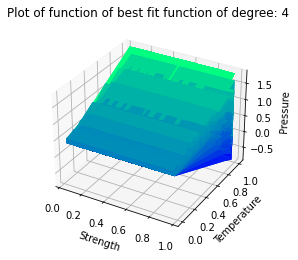


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  5  :   [3.26236227]
Error of  5  iteration of degree  5  :   [0.26595262]
Error of  10  iteration of degree  5  :   [0.13549248]
Error of  15  iteration of degree  5  :   [0.12498782]
Error of  20  iteration of degree  5  :   [0.12002932]
Error of  25  iteration of degree  5  :   [0.11571379]
Error of  30  iteration of degree  5  :   [0.11174046]
Error of  35  iteration of degree  5  :   [0.10803173]
Error of  40  iteration of degree  5  :   [0.10454006]
Error of  45  iteration of degree  5  :   [0.10123279]
Error of  50  iteration of degree  5  :   [0.09808683]

Error of end of iteration of degree  5  is:   [0.09808683]


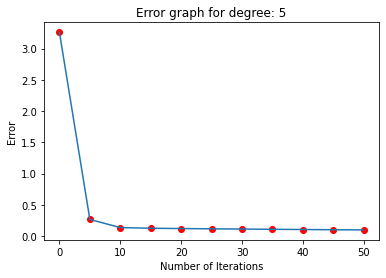

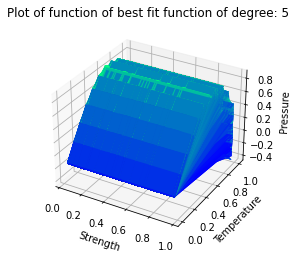


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  6  :   [0.46941795]
Error of  5  iteration of degree  6  :   [0.32775647]
Error of  10  iteration of degree  6  :   [0.24442988]
Error of  15  iteration of degree  6  :   [0.19164681]
Error of  20  iteration of degree  6  :   [0.15737733]
Error of  25  iteration of degree  6  :   [0.1344688]
Error of  30  iteration of degree  6  :   [0.11858207]
Error of  35  iteration of degree  6  :   [0.10707911]
Error of  40  iteration of degree  6  :   [0.09835306]
Error of  45  iteration of degree  6  :   [0.09142244]
Error of  50  iteration of degree  6  :   [0.08568519]

Error of end of iteration of degree  6  is:   [0.08568519]


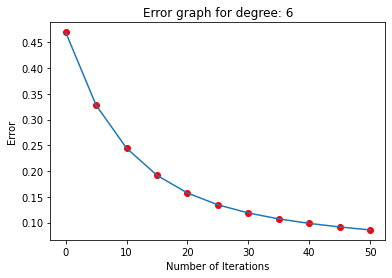

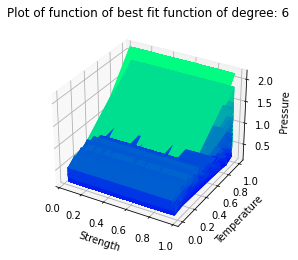


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  7  :   [0.30201758]
Error of  5  iteration of degree  7  :   [0.05919112]
Error of  10  iteration of degree  7  :   [0.05248397]
Error of  15  iteration of degree  7  :   [0.05124357]
Error of  20  iteration of degree  7  :   [0.05023297]
Error of  25  iteration of degree  7  :   [0.04931082]
Error of  30  iteration of degree  7  :   [0.048459]
Error of  35  iteration of degree  7  :   [0.047667]
Error of  40  iteration of degree  7  :   [0.04692739]
Error of  45  iteration of degree  7  :   [0.04623453]
Error of  50  iteration of degree  7  :   [0.04558395]

Error of end of iteration of degree  7  is:   [0.04558395]


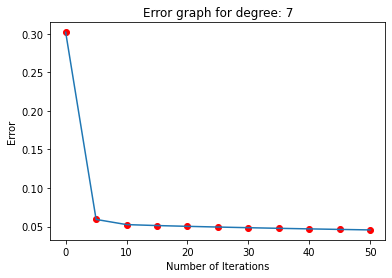

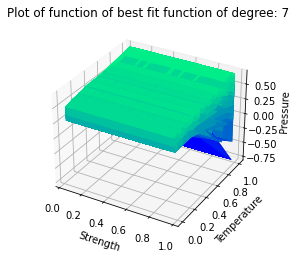


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  8  :   [0.83822141]
Error of  5  iteration of degree  8  :   [0.47186652]
Error of  10  iteration of degree  8  :   [0.37658335]
Error of  15  iteration of degree  8  :   [0.31911747]
Error of  20  iteration of degree  8  :   [0.28065362]
Error of  25  iteration of degree  8  :   [0.25288804]
Error of  30  iteration of degree  8  :   [0.23137977]
Error of  35  iteration of degree  8  :   [0.2137196]
Error of  40  iteration of degree  8  :   [0.19858332]
Error of  45  iteration of degree  8  :   [0.1852279]
Error of  50  iteration of degree  8  :   [0.17322289]

Error of end of iteration of degree  8  is:   [0.17322289]


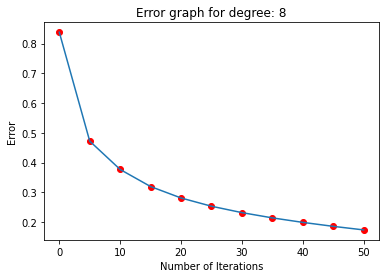

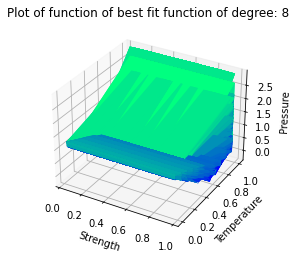


---------------------------------------------------------------------------------------------------------------------


Error of  0  iteration of degree  9  :   [0.16944118]
Error of  5  iteration of degree  9  :   [0.09046366]
Error of  10  iteration of degree  9  :   [0.07653012]
Error of  15  iteration of degree  9  :   [0.06766326]
Error of  20  iteration of degree  9  :   [0.0612342]
Error of  25  iteration of degree  9  :   [0.05624053]
Error of  30  iteration of degree  9  :   [0.05215954]
Error of  35  iteration of degree  9  :   [0.04870767]
Error of  40  iteration of degree  9  :   [0.04572366]
Error of  45  iteration of degree  9  :   [0.04310978]
Error of  50  iteration of degree  9  :   [0.04080202]

Error of end of iteration of degree  9  is:   [0.04080202]


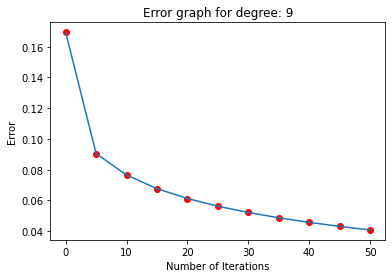

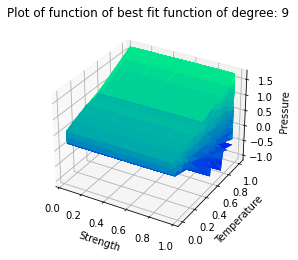


---------------------------------------------------------------------------------------------------------------------



Degree  9  gives minimum error.


In [7]:
#For training data

minError = 100000
minErrorDeg = -1
x_axis=[]

for i in range(iter_scaled):
    x_axis.append(i*skip_num)

for i in range(maxDeg+1):
#     if i==0:
#         continue
    GD_Error = GD(i, train_X1, train_X2, train_Y, 0.1 , iter_value)
    if(GD_Error <= minError):
        minError = GD_Error
        minErrorDeg = i

    error_list = error_array[i].tolist()
    
    plt.plot(x_axis, error_list)
    plt.scatter(x_axis, error_list, marker='o', color='red')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Error')
    title = "Error graph for degree: " + str(i)
    plt.title(title)
    plt.show()
    
    
    x = test_X1
    y = test_X2
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((495,495))
    for m in range(i+1):                    # power of x1
        for n in range(i+1-m):            # power of x2
            Z += coeff_list[i][m][n]*(x**m) * (y**n)

            
    # Plotting of Surface Plots
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='winter', edgecolor='none')

    ax.set_xlabel('Strength')
    ax.set_ylabel('Temperature')
    ax.set_zlabel('Pressure')
    title = "Plot of function of best fit function of degree: " + str(i)
    ax.set_title(title)
    plt.show()
    
    print("\n---------------------------------------------------------------------------------------------------------------------\n\n")
    
print("\nDegree ", minErrorDeg, " gives minimum error.")      

In [8]:
def Error(deg, X1, X2, Y):
    
    totalTestingError = 0
    for z in range(len(Y)):   # for each row in input data
        row1 = X1[z]                  # contains strength
        row2 = X2[z]                 # contains temperature
        column = Y[z]
        testingError = 0
            
        for m in range(deg+1):                    # power of x1
            for n in range(deg+1-m):            # power of x2
                testingError += coeff_list[deg][m][n] * (row1**m) * (row2**n)    # summation of (w0+ w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
                    
        testingError -= column                  # yn - (w0 + w1*x1 + w2*x1^2 + w3*x1*x2 + w4*x2^2 ...)
        totalTestingError +=  ((testingError**2)*0.5)/len(Y)  
        
    print("Testing error of degree ", deg, " is: " ,totalTestingError)
            
    return totalTestingError

In [9]:
# for testing data

minError = 100000
minErrorDeg = -1
print("Testing errors for various degrees are as follows:")

for i in range(maxDeg+1):
    SGD_Error = Error(i, test_X1, test_X2, test_Y)    
    if(SGD_Error < minError):
        minError = SGD_Error
        minErrorDeg = i
        
print("\nDegree ", minErrorDeg, " gives minimum error. \nTesting error = ", minError) 


Testing errors for various degrees are as follows:
Testing error of degree  0  is:  [0.059444]
Testing error of degree  1  is:  [0.06281352]
Testing error of degree  2  is:  [0.10459542]
Testing error of degree  3  is:  [0.08532596]
Testing error of degree  4  is:  [0.18252963]
Testing error of degree  5  is:  [0.09966407]
Testing error of degree  6  is:  [0.09217075]
Testing error of degree  7  is:  [0.04414647]
Testing error of degree  8  is:  [0.21614258]
Testing error of degree  9  is:  [0.04275682]

Degree  9  gives minimum error. 
Testing error =  [0.04275682]
